**Part 1 – Reaction Yield Data Cleaning**

_This is the code used to clean the reaction yield data from raw csv file._

# Exploratory Data Analysis (EDA)

## From Paper and Document Sides

From the paper side:

1 According to paper, there are 4608 reactions (including controls).

2 According to Supporting Information (SI), there are 3 plates of experiments, each plate has 1536 experiments (32 rows * 48 columns).

3 The reaction conditions of each experiement can be accessed in Table S1 and Table S2.

From the document (excel) side:

1 These plate yield data is stored in folder 'rxnpredict-master/yield_data/'.

2 For each plate, there are four excel files. For example, plate1 has four excel documents, 'plate1.1.csv', 'plate1.2.csv', 'plate1.3.csv', 'plate1.4.csv'. 

3 Target data, yield, is stored under the column 'product_scaled' in each excel file, each 'product_scaled' column has 384 data.

## How Data Splitted in Each Subplate

Using plate1 as example.

Plate 1 has 1536 experiments, with 32 rows (R1 - R32) and 48 columns (C1 - C48). For simplification, R5C10 means the experiment data stored in row 5 column 10. 

Plate 1 data is evenly splitted into 4 subplate, plate1.1, plate1.2, plate1.3, plate1.4. 

plate1.1 has the data of 16 rows (R1 - R16) and 24 columns (C1 - C24), 384 data in total.

plate1.2 has the data of 16 rows (R1 - R16) and 24 columns (C25 - C48), 384 data in total.

plate1.3 has the data of 16 rows (R17 - R32) and 24 columns (C1 - C24), 384 data in total.

plate1.4 has the data of 16 rows (R17 - R32) and 24 columns (C25 - C48), 384 data in total.

In the 'product_scaled' column of  'plate1.1.csv', it has 384 data. The experiment plate1.1 data is stored in the order of each 
row (left to right) then each column (up to down). Therefore the data in 'product_scaled' column of  'plate1.1.csv', from up to down, correspond to R1C1, R1C2, R1C3 ... R1C22, R1C23, R1C24, R2C1, R2C2, R2C3 ... R2C24, R3C1 ...... R15C24, R16C1 ... R16C22, R16C23, R16C24 in the plate 1 data.

Similarly, the data in 'product_scaled' column of  'plate1.2.csv', from up to down, correspond to R1C25, ... R1C48, R2C25 ... R2C48, R3C25 ...... R15C48, R16C25 ...... R16C48 in the plate 1 data.

The data in 'product_scaled' column of  'plate1.3.csv', from up to down, correspond to R17C1, ... R17C24, R18C1 ... R18C24, R19C1 ...... R31C24, R32C1 ...... R32C24 in the plate 1 data.

The data in 'product_scaled' column of  'plate1.4.csv', from up to down, correspond to R17C25, ... R17C48, R18C25 ... R18C48, R19C25 ...... R31C48, R32C25 ...... R32C48 in the plate 1 data.

## EDA in Python

Before starting using python, import commonly used packages and do figure setting.

In [2]:
# Common imports
import numpy as np
import pandas as pd

# Figures setting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Let's start with importing 'plate1.1.csv' file.

In [6]:
plate1_1 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate1.1.csv')

Check data structure of plate1_1, with two commonly used function, info() and head()

In [7]:
plate1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 59 columns):
product                            384 non-null float64
additive                           288 non-null float64
internal_standard                  384 non-null float64
corr_factor                        368 non-null float64
product_scaled                     384 non-null float64
additive_scaled                    384 non-null float64
Sample Name                        384 non-null object
Data File                          384 non-null object
Location                           384 non-null object
UV210_toluidine Rt(min)            384 non-null float64
UV210_toluidine AreaAbs            384 non-null float64
UV210_CF3product Rt(min)           384 non-null float64
UV210_CF3product AreaAbs           384 non-null float64
UV210_Internal_standard Rt(min)    384 non-null float64
UV210_Internal_standard AreaAbs    384 non-null float64
UV210_CF3-Cl Rt(min)               384 non-null float64
UV

In [8]:
plate1_1.head()

,product,additive,internal_standard,corr_factor,product_scaled,additive_scaled,Sample Name,Data File,Location,UV210_toluidine Rt(min),...,UV210_2-pyr-I Rt(min),UV210_2-pyr-I AreaAbs,UV210_3-py_product Rt(min),UV210_3-py_product AreaAbs,UV210_3-pyr-Cl Rt(min),UV210_3-pyr-Cl AreaAbs,UV210_3-pyr-Br Rt(min),UV210_3-pyr-Br AreaAbs,UV210_3-pyr-I Rt(min),UV210_3-pyr-I AreaAbs
0,49912.71291,NaN,14511.76925,1.042357,26.888615,0.0,2016-Dec14-1536-CN-Plate1-1-2.Raw,2016-dec14-1536-cn-plate1-1-2.raw,1:A,0.464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,46876.34031,NaN,15229.21474,1.042357,24.063224,0.0,2016-Dec14-1536-CN-Plate1-17.Raw,2016-dec14-1536-cn-plate1-17.raw,2:A,0.463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,111688.00390,NaN,18375.78594,1.042357,47.515821,0.0,2016-Dec14-1536-CN-Plate1-33.Raw,2016-dec14-1536-cn-plate1-33.raw,3:A,0.462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5426.81110,NaN,18154.89427,0.948682,2.126831,0.0,2016-Dec14-1536-CN-Plate1-49.Raw,2016-dec14-1536-cn-plate1-49.raw,4:A,0.465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,132197.04010,NaN,19766.11537,0.948682,47.586354,0.0,2016-Dec14-1536-CN-Plate1-65.Raw,2016-dec14-1536-cn-plate1-65.raw,5:A,0.464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We could see that target data 'product_scaled' of plate1_1 has 384 non-null float64 data, which can be used directly for further analysis.

Now we use similar methods to check 'plate1.2.csv', 'plate1.3.csv' and 'plate1.4.csv' files.

In [9]:
# Plate1.2
plate1_2 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate1.2.csv')

In [10]:
plate1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 55 columns):
product                            352 non-null float64
additive                           288 non-null float64
internal_standard                  384 non-null float64
corr_factor                        352 non-null float64
product_scaled                     384 non-null float64
additive_scaled                    384 non-null float64
Sample Name                        384 non-null object
Data File                          384 non-null object
Location                           384 non-null object
UV210_toluidine Rt(min)            384 non-null float64
UV210_toluidine AreaAbs            384 non-null float64
UV210_Et-I Rt(min)                 384 non-null float64
UV210_Et-I AreaAbs                 384 non-null float64
UV210_Et_product Rt(min)           384 non-null float64
UV210_Et_product AreaAbs           384 non-null float64
UV210_Additive_2 Rt(min)           384 non-null float64
UV

In [11]:
plate1_2.head()

,product,additive,internal_standard,corr_factor,product_scaled,additive_scaled,Sample Name,Data File,Location,UV210_toluidine Rt(min),...,UV210_OMe-Br Rt(min),UV210_OMe-Br AreaAbs,UV210_OMe-I Rt(min),UV210_OMe-I AreaAbs,UV210_Et-Cl Rt(min),UV210_Et-Cl AreaAbs,UV210_Et-Br Rt(min),UV210_Et-Br AreaAbs,UV210_Internal_standard Rt(min),UV210_Internal_standard AreaAbs
0,63035.26238,NaN,18981.12836,1.337543,33.314294,0.0,2016-Dec14-1536-CN-Plate2-1.Raw,2016-dec14-1536-cn-plate2-1.raw,1:A,0.465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.769,18981.12836
1,28511.17865,NaN,21565.29685,2.843726,28.197374,0.0,2016-Dec14-1536-CN-Plate2-17.Raw,2016-dec14-1536-cn-plate2-17.raw,2:A,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.771,21565.29685
2,47122.64014,NaN,19469.03815,2.843726,51.621909,0.0,2016-Dec14-1536-CN-Plate2-33.Raw,2016-dec14-1536-cn-plate2-33.raw,3:A,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.771,19469.03815
3,51955.14271,NaN,20046.47210,2.843726,55.276371,0.0,2016-Dec14-1536-CN-Plate2-49.Raw,2016-dec14-1536-cn-plate2-49.raw,4:A,0.465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.771,20046.47210
4,17348.05782,NaN,20038.88978,2.174082,14.116092,0.0,2016-Dec14-1536-CN-Plate2-65.Raw,2016-dec14-1536-cn-plate2-65.raw,5:A,0.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.771,20038.88978


In [12]:
# Plate1.3
plate1_3 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate1.3.csv')

In [13]:
plate1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 59 columns):
product                            366 non-null float64
additive                           382 non-null float64
internal_standard                  382 non-null float64
corr_factor                        368 non-null float64
product_scaled                     384 non-null object
additive_scaled                    382 non-null float64
Sample Name                        382 non-null object
Data File                          382 non-null object
Location                           382 non-null object
UV210_toluidine Rt(min)            382 non-null float64
UV210_toluidine AreaAbs            382 non-null float64
UV210_CF3_product Rt(min)          382 non-null float64
UV210_CF3_product AreaAbs          382 non-null float64
UV210_Additive_7 Rt(min)           382 non-null float64
UV210_Additive_7 AreaAbs           382 non-null float64
UV210_Additive_3 Rt(min)           382 non-null float64
UV2

In [14]:
plate1_3.head()

,product,additive,internal_standard,corr_factor,product_scaled,additive_scaled,Sample Name,Data File,Location,UV210_toluidine Rt(min),...,UV210_3pyr-Cl Rt(min),UV210_3pyr-Cl AreaAbs,UV210_3pyr_product Rt(min),UV210_3pyr_product AreaAbs,UV210_3pyr-Br Rt(min),UV210_3pyr-Br AreaAbs,UV210_3pyr-I Rt(min),UV210_3pyr-I AreaAbs,UV210_Internal_standard Rt(min),UV210_Internal_standard AreaAbs
0,22046.23097,0.0,13623.18484,1.042357,12.6512469,0.0,2016-Dec14-1536-CN-Plate3-1.Raw,2016-dec14-1536-cn-plate3-1.raw,1:A,0.465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.768,13623.18484
1,33206.76868,0.0,18761.15585,1.042357,13.83708642,0.0,2016-Dec14-1536-CN-Plate3-17.Raw,2016-dec14-1536-cn-plate3-17.raw,2:A,0.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.769,18761.15585
2,38215.77576,0.0,19871.76422,1.042357,15.0343232,0.0,2016-Dec14-1536-CN-Plate3-33.Raw,2016-dec14-1536-cn-plate3-33.raw,3:A,0.467,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.769,19871.76422
3,5390.93219,0.0,20656.93409,0.948682,1.856863727,0.0,2016-Dec14-1536-CN-Plate3-49.Raw,2016-dec14-1536-cn-plate3-49.raw,4:A,0.468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.769,20656.93409
4,12665.38017,0.0,20741.62577,0.948682,4.344676685,0.0,2016-Dec14-1536-CN-Plate3-65.Raw,2016-dec14-1536-cn-plate3-65.raw,5:A,0.469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.770,20741.62577


In [15]:
# Plate1.4
plate1_4 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate1.4.csv')

In [16]:
plate1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 61 columns):
product                            346 non-null float64
additive                           377 non-null float64
internal_standard                  377 non-null float64
corr_factor                        352 non-null float64
product_scaled                     377 non-null float64
additive_scaled                    377 non-null float64
Sample Name                        377 non-null object
Data File                          377 non-null object
Location                           377 non-null object
UV210_toluidine Rt(min)            377 non-null float64
UV210_toluidine AreaAbs            377 non-null float64
UV210_Additive_1 Rt(min)           377 non-null float64
UV210_Additive_1 AreaAbs           377 non-null float64
UV210_Et-I Rt(min)                 377 non-null float64
UV210_Et-I AreaAbs                 377 non-null float64
UV210_Et_product Rt(min)           377 non-null float64
UV

In [17]:
plate1_4.head()

,product,additive,internal_standard,corr_factor,product_scaled,additive_scaled,Sample Name,Data File,Location,UV210_toluidine Rt(min),...,UV210_OMe_product Rt(min),UV210_OMe_product AreaAbs,UV210_OMe-Br Rt(min),UV210_OMe-Br AreaAbs,UV210_OMe-I Rt(min),UV210_OMe-I AreaAbs,UV210_Et-Cl Rt(min),UV210_Et-Cl AreaAbs,UV210_Et-Br Rt(min),UV210_Et-Br AreaAbs
0,20862.68292,3479.44139,18347.35860,1.337543,11.406849,1.422320,2016-Dec14-1536-CN-Plate4-1.Raw,2016-dec14-1536-cn-plate4-1.raw,1:A,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15469.15258,6905.39012,19604.22970,2.843726,16.829286,2.641799,2016-Dec14-1536-CN-Plate4-17.Raw,2016-dec14-1536-cn-plate4-17.raw,2:A,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32815.94554,12811.34110,19694.23131,2.843726,35.538151,4.878843,2016-Dec14-1536-CN-Plate4-33.Raw,2016-dec14-1536-cn-plate4-33.raw,3:A,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37963.06938,15819.55199,19294.31410,2.843726,41.964390,6.149306,2016-Dec14-1536-CN-Plate4-49.Raw,2016-dec14-1536-cn-plate4-49.raw,4:A,0.466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3736.25157,1833.19534,20883.91144,2.174082,2.917169,0.658352,2016-Dec14-1536-CN-Plate4-65.Raw,2016-dec14-1536-cn-plate4-65.raw,5:A,0.468,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After checking other three csv files, we can see that 'product_scaled' of plate1_2 has 384 non-null float64 data, which is good to use.

For 'product_scaled' of plate1_3, the result shows '384 non-null object'. Data type object can't be processed directly for further analysis such as making plot. To solve this problem in this situation, we could just quickly take a look of the excel file, then we will see row 120 and row144 in the plate1.3.csv is '#VALUE!', this represent missing value for csv file. Some other missing value representations are '#DIV/0!', 'NA' or just blank data. We can tell python a list of missing values to solve this problem. 

For 'product_scaled' of plate1_4, the result shows '377 non-null float64'. Notice that the number is 377, not 384 like other three files. This is another type missing value problem. After a quick look at the csv file, we could see there are some 'NA' data. One method to deal with missing value is to use fillna() method, in this situation, we will just fill 'NA' with 0.

In [18]:
# Updated plate1_3 data
plate1_3 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate1.3.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)

In [19]:
plate1_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 59 columns):
product                            384 non-null float64
additive                           384 non-null float64
internal_standard                  384 non-null float64
corr_factor                        384 non-null float64
product_scaled                     384 non-null float64
additive_scaled                    384 non-null float64
Sample Name                        384 non-null object
Data File                          384 non-null object
Location                           384 non-null object
UV210_toluidine Rt(min)            384 non-null float64
UV210_toluidine AreaAbs            384 non-null float64
UV210_CF3_product Rt(min)          384 non-null float64
UV210_CF3_product AreaAbs          384 non-null float64
UV210_Additive_7 Rt(min)           384 non-null float64
UV210_Additive_7 AreaAbs           384 non-null float64
UV210_Additive_3 Rt(min)           384 non-null float64
UV

Now the plate1_3 result shows that 'product_scaled' is 384 non-null float64.

We apply similar method to plate1.4.csv.

In [20]:
# Updated plate1_4 data
plate1_4 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate1.4.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)

In [21]:
plate1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 61 columns):
product                            384 non-null float64
additive                           384 non-null float64
internal_standard                  384 non-null float64
corr_factor                        384 non-null float64
product_scaled                     384 non-null float64
additive_scaled                    384 non-null float64
Sample Name                        384 non-null object
Data File                          384 non-null object
Location                           384 non-null object
UV210_toluidine Rt(min)            384 non-null float64
UV210_toluidine AreaAbs            384 non-null float64
UV210_Additive_1 Rt(min)           384 non-null float64
UV210_Additive_1 AreaAbs           384 non-null float64
UV210_Et-I Rt(min)                 384 non-null float64
UV210_Et-I AreaAbs                 384 non-null float64
UV210_Et_product Rt(min)           384 non-null float64
UV

Now 'product_scaled' of plate1_4 is also 384 non-null float64.

We can go next step to extract target column. 

In [22]:
plate1_1_yield = plate1_1['product_scaled']
plate1_2_yield = plate1_2['product_scaled']
plate1_3_yield = plate1_3['product_scaled']
plate1_4_yield = plate1_4['product_scaled']

Now Let's check the data structure of each subplate yield

In [23]:
plate1_1_yield

0      26.888615
1      24.063224
2      47.515821
3       2.126831
4      47.586354
5      50.060026
6      26.623393
7      71.962560
8      73.697234
9      17.985710
10     21.488336
11     21.327764
12     49.059786
13     13.607072
14     75.739228
15      0.000000
16     20.671717
17     37.065176
18     40.108917
19      1.571874
20     13.579588
21     19.584570
22      5.831101
23     34.705647
24     10.657812
25     14.747896
26     18.278686
27      2.475058
28      6.119058
29      5.449924
         ...    
354    44.441973
355     0.000000
356    21.712229
357    43.864265
358     0.000000
359    39.831557
360     7.764964
361    31.457764
362    39.804144
363     0.230274
364    47.713002
365    54.769859
366     0.737631
367    74.138884
368    71.265048
369    64.028882
370    74.639302
371    76.160705
372     5.908086
373    52.866475
374    56.034130
375     0.000000
376    12.721219
377    41.677715
378    43.874485
379     0.316193
380    40.294189
381    45.4001

In [24]:
plate1_2_yield

0      33.314294
1      28.197374
2      51.621909
3      55.276371
4      14.116092
5      28.415223
6      41.523397
7       0.000000
8      15.771898
9      32.027695
10     43.170906
11      1.534950
12     11.110655
13     27.550186
14      7.170838
15     30.199030
16     66.749508
17     29.587124
18     54.898343
19     67.302644
20     13.517446
21     33.448978
22     50.164385
23      0.000000
24     25.073659
25     21.666586
26     48.487494
27     58.610757
28      4.169293
29     11.383346
         ...    
354    95.555155
355    99.034462
356     2.310619
357    86.535417
358    94.500967
359     0.000000
360    78.619620
361    45.307385
362    56.654018
363    68.606115
364    12.486359
365    69.816263
366    75.301799
367     0.000000
368    14.492544
369    52.135716
370    48.865817
371     0.364668
372    55.180370
373    55.012232
374     1.087257
375    81.228307
376    80.710998
377    86.200175
378    84.177960
379    95.675913
380    14.500838
381    91.5286

In [25]:
plate1_3_yield

0      12.651247
1      13.837086
2      15.034323
3       1.856864
4       4.344677
5       5.971177
6       8.323185
7      13.246920
8      15.011788
9      12.985844
10     17.087565
11     19.421529
12     61.688852
13     64.529025
14     64.667570
15      0.000000
16     14.268953
17     24.930138
18     38.550673
19      0.000000
20      1.224186
21      2.633257
22      1.932595
23      8.432864
24      2.968870
25      2.391871
26     20.867476
27      2.064063
28     11.130980
29     14.366936
         ...    
354    52.244726
355     0.338169
356    43.344126
357    53.384440
358     0.841459
359    72.182274
360     1.784972
361     7.440215
362     6.314820
363     0.999277
364    10.415198
365     8.359124
366     3.678283
367    11.713082
368    13.979975
369    14.351521
370    15.086541
371    20.143408
372     0.000000
373     0.000000
374     0.000000
375     0.000000
376     0.000000
377     0.449135
378     0.726791
379     0.000000
380     0.000000
381     0.0000

In [26]:
plate1_4_yield

0      11.406849
1      16.829286
2      35.538151
3      41.964390
4       2.917169
5       7.768372
6      14.741484
7       0.000000
8      21.509780
9      20.962724
10     26.678065
11      0.000000
12      3.941726
13      7.774794
14      2.331534
15     15.287775
16     23.435792
17     15.697964
18     27.334827
19     34.446325
20      9.061926
21     20.113327
22     25.939748
23      0.000000
24     36.028896
25     32.927760
26     59.552626
27     57.605375
28     18.463430
29     36.809662
         ...    
354    89.474121
355    95.752606
356     9.967076
357    86.089809
358    94.549813
359     0.000000
360     3.693987
361     0.000000
362     2.398451
363     4.245475
364    19.768415
365    23.149882
366    24.586092
367     0.000000
368     2.832564
369     7.993090
370    12.931682
371     0.000000
372     5.592490
373     7.956770
374     0.628554
375    11.322028
376    20.745226
377    35.618808
378    41.041416
379    55.115246
380    24.773648
381    33.5068

Everything looks good! 

As mentioned in the beginning part about how plate data is splitted into each subplate, and how the data is stored. Now we are going to 'reverse' the data back to plate-like structure: matrix. Also, we will pass the correct column number to the data.

Here we are using method, reshape() to make these 1-D data matrix-like structure. 

Remember, each subplate should have 16 rows and 24 columns.

In [27]:
# Plate1_1 reshape
plate1_1_yield_reshaped = pd.DataFrame(plate1_1_yield.values.reshape((16,24)))

In [28]:
plate1_1_yield_reshaped

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,26.888615,24.063224,47.515821,2.126831,47.586354,50.060026,26.623393,71.962560,73.697234,17.985710,...,75.739228,0.0,20.671717,37.065176,40.108917,1.571874,13.579588,19.584570,5.831101,34.705647
1,10.657812,14.747896,18.278686,2.475058,6.119058,5.449924,7.802080,14.234178,15.413893,9.465696,...,13.175217,0.0,14.018641,30.591262,38.155736,0.456472,3.867386,7.024622,2.846164,18.869009
2,3.606677,35.078662,43.318146,0.000000,29.298178,37.565356,0.960810,59.019681,70.968730,35.139527,...,48.708232,0.0,5.008761,35.088724,41.245607,0.000000,13.976947,18.895249,0.705195,32.632341
3,22.166448,23.211569,34.748764,0.948129,16.649665,19.999826,4.992379,53.996993,57.375490,22.611658,...,30.871129,0.0,20.360960,38.916904,41.700050,0.940122,14.904507,19.596159,4.179760,39.008159
4,43.246874,47.072017,46.679233,1.477833,52.016631,49.533289,15.238016,76.008061,63.588682,56.116780,...,73.245932,0.0,33.753121,43.984347,45.013459,1.141183,45.262431,48.877456,5.162111,70.200393
5,15.417636,18.974171,16.815892,2.663355,16.048548,21.976633,7.641918,28.392318,26.674899,29.975430,...,28.589648,0.0,16.884861,41.296984,43.732981,0.655701,33.629056,41.489808,2.599454,66.024014
6,5.980980,50.582897,45.080480,0.000000,42.119461,49.111432,0.705225,70.862191,66.449518,65.939881,...,72.630649,0.0,7.837919,46.747111,46.258380,0.000000,37.030376,43.695602,0.595873,70.549553
7,45.048739,45.781001,44.653713,0.924542,44.558876,43.357210,3.420166,72.848314,65.311852,56.832804,...,69.089044,0.0,31.880448,44.817543,46.649895,0.668793,39.529864,43.871833,2.746124,72.637709
8,11.264227,37.482049,41.441061,0.000000,38.304316,53.104009,3.075984,77.361447,66.862345,65.327138,...,59.526532,0.0,34.716453,43.573023,48.324396,0.607064,28.837839,37.432552,2.859919,70.013459
9,7.372693,9.714563,9.546871,1.022402,12.592787,14.012417,4.337310,19.473790,23.296079,24.900114,...,15.126717,0.0,3.886636,25.834572,44.587991,0.000000,15.166649,40.374031,0.000000,27.795773


The plate1_1_yield_reshaped data looks good!

One note here is that the index of python data starts from 0, if you are brandly new to python.

For the plate1_2 data, we will pass the correct column number, from 24 to 47 (remember python indexing rule).

In [29]:
# Plate1_2_yield_reshaped
plate1_2_yield_reshaped = pd.DataFrame(plate1_2_yield.values.reshape((16,24)), columns=np.arange(24,48))
plate1_2_yield_reshaped

,24,25,26,27,28,29,30,31,32,33,...,38,39,40,41,42,43,44,45,46,47
0,33.314294,28.197374,51.621909,55.276371,14.116092,28.415223,41.523397,0.0,15.771898,32.027695,...,7.170838,30.199030,66.749508,29.587124,54.898343,67.302644,13.517446,33.448978,50.164385,0.0
1,25.073659,21.666586,48.487494,58.610757,4.169293,11.383346,24.418182,0.0,14.967396,30.286255,...,3.920306,15.397530,22.450649,23.686174,42.694859,54.833609,6.351542,14.164722,17.378304,0.0
2,31.818372,30.425439,53.635780,59.476744,2.014672,26.513526,36.850379,0.0,4.820162,34.806286,...,0.546830,35.870556,68.844495,33.875422,63.069719,70.629892,2.481416,31.678005,46.014200,0.0
3,37.169624,31.617255,51.216543,57.551289,16.173827,26.587513,40.413276,0.0,16.965316,34.377255,...,4.206952,39.804358,66.763595,38.143027,56.516674,67.971728,13.292716,32.516603,47.334810,0.0
4,76.217787,68.572685,82.686578,81.209845,45.572952,80.415221,87.277323,0.0,46.279531,50.465621,...,5.937925,83.761103,78.835107,80.947397,94.397752,95.423351,65.022002,98.035898,99.686532,0.0
5,72.390525,68.846554,82.184782,80.589172,15.194521,83.874454,86.003404,0.0,30.012157,51.397088,...,15.319429,81.569431,77.573712,86.689600,92.914234,97.568500,35.555047,98.731320,98.287226,0.0
6,80.904099,70.205564,83.088462,85.144652,3.149733,78.084615,82.137375,0.0,7.782359,53.599870,...,0.646779,86.597578,84.895513,91.390642,97.292933,99.619107,4.166287,92.572479,94.691054,0.0
7,82.328858,73.643224,87.902015,86.219798,34.208444,77.332942,80.600559,0.0,42.282293,50.286654,...,4.582095,78.801089,79.444832,84.856098,93.310834,93.874541,44.027523,89.480651,91.485094,0.0
8,78.088776,70.198677,81.980803,85.257210,39.128942,76.742294,84.979928,0.0,33.610436,49.613676,...,0.000000,81.917266,84.297489,86.214974,92.930932,98.033846,43.933313,94.935802,96.147987,0.0
9,72.313513,32.001600,51.813461,83.364368,2.641901,57.977528,80.289943,0.0,9.564950,37.213818,...,0.000000,57.450487,77.027330,69.398552,85.441971,92.003250,21.861786,83.654332,92.956703,0.0


Use similar methods for plate1_3 and plate1_4

In [30]:
# Plate1_3_yield_reshaped
plate1_3_yield_reshaped = pd.DataFrame(plate1_3_yield.values.reshape((16,24)))
plate1_3_yield_reshaped

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,12.651247,13.837086,15.034323,1.856864,4.344677,5.971177,8.323185,13.246920,15.011788,12.985844,...,64.667570,0.0,14.268953,24.930138,38.550673,0.000000,1.224186,2.633257,1.932595,8.432864
1,2.968870,2.391871,20.867476,2.064063,11.130980,14.366936,9.085602,51.715384,53.239364,10.595660,...,19.294010,0.0,24.421525,35.720582,34.688665,1.299882,17.269810,28.371874,5.370037,37.711863
2,5.928430,9.302545,34.880773,0.471104,28.774828,35.214977,4.111488,64.272335,65.694567,14.114804,...,16.848420,0.0,19.586858,43.742978,41.132264,0.437181,23.411911,34.228713,2.005732,50.975113
3,7.529872,6.207240,6.570809,1.437205,3.173409,3.841377,5.555293,8.265401,7.744182,8.325691,...,0.000000,0.0,0.000000,0.000000,0.908865,0.000000,0.000000,0.000000,0.000000,0.000000
4,14.565380,18.743509,19.608398,2.060582,16.390306,19.658402,6.853480,26.756457,27.048612,31.299099,...,70.580383,0.0,12.563003,47.024271,48.561216,0.529819,47.276880,55.193492,0.000000,73.272802
5,34.286727,51.071283,44.712413,1.112505,50.906186,54.237060,4.695061,83.303614,70.007851,52.854430,...,1.834161,0.0,39.946944,54.223755,50.124677,1.102453,45.396547,51.573547,0.000000,77.858024
6,31.761019,47.942429,42.812928,0.398860,45.575765,49.320932,3.622466,75.311154,67.191849,54.630798,...,0.000000,0.0,34.309188,52.550620,52.378114,0.695297,43.182647,52.563565,3.012114,80.582819
7,10.837660,12.508038,12.739554,2.394993,11.431883,12.303480,6.790590,20.800367,21.680532,17.933315,...,0.000000,0.0,0.790615,2.526419,3.157274,0.000000,2.851220,6.027660,0.560055,7.355604
8,9.322132,13.233894,12.656115,0.862512,11.125956,11.335412,3.848768,26.556737,25.421178,23.700563,...,66.635441,0.0,3.468902,31.179557,44.262895,0.000000,11.313521,33.794360,0.000000,36.543820
9,7.021684,32.410682,34.604297,0.518079,38.442405,50.898165,5.429390,70.229075,73.444866,68.990913,...,4.592619,0.0,25.851249,48.480547,47.294049,0.682447,40.823493,45.500899,2.461539,73.583600


In [31]:
# Plate1_4_yield_reshaped
plate1_4_yield_reshaped = pd.DataFrame(plate1_4_yield.values.reshape((16,24)), columns=np.arange(24,48))
plate1_4_yield_reshaped

,24,25,26,27,28,29,30,31,32,33,...,38,39,40,41,42,43,44,45,46,47
0,11.406849,16.829286,35.538151,41.964390,2.917169,7.768372,14.741484,0.0,21.509780,20.962724,...,2.331534,15.287775,23.435792,15.697964,27.334827,34.446325,9.061926,20.113327,25.939748,0.0
1,36.028896,32.927760,59.552626,57.605375,18.463430,36.809662,44.330847,0.0,26.526465,40.071988,...,4.673154,33.710905,58.954234,32.369079,58.309381,63.629099,15.145841,31.993725,53.364639,0.0
2,50.545145,39.190225,59.137129,63.461280,14.562583,42.706876,51.178354,0.0,20.798939,44.038449,...,1.922792,42.321242,66.267457,38.268112,65.278495,69.516985,11.651142,35.816760,49.096822,0.0
3,2.861267,1.750205,2.483550,3.276928,19.540009,22.732413,23.800616,0.0,0.323933,0.797105,...,0.000000,0.000000,0.640486,0.000000,2.151156,4.021363,20.081561,23.276997,24.544318,0.0
4,77.786821,69.394959,84.602020,85.140153,12.483837,78.004951,83.737220,0.0,26.052845,53.839229,...,16.249001,79.872416,81.151167,88.446373,93.099507,99.999990,36.893915,94.346234,93.028872,0.0
5,80.135870,80.588630,86.254116,91.933402,49.309971,86.105074,88.167540,0.0,45.040991,52.018965,...,6.591475,83.096474,79.261607,86.194399,91.266945,95.386488,63.264436,94.879948,93.421115,0.0
6,81.020949,76.635156,88.444851,90.227930,30.758172,85.683575,86.971127,0.0,34.966274,0.000000,...,3.893641,79.055426,79.638862,86.003454,92.137195,91.510969,30.835226,92.723707,92.256028,0.0
7,12.617286,0.000000,11.745269,16.429312,21.055335,25.495340,27.032406,0.0,20.407500,35.111123,...,5.300523,36.101386,51.519781,81.906900,90.043149,93.690586,37.688451,63.380365,63.368729,0.0
8,78.505600,32.190592,55.460406,81.635116,4.546243,60.549135,71.150775,0.0,22.423475,41.464683,...,7.805739,52.907748,83.294378,50.808720,71.493850,99.999990,29.949428,80.027679,88.404273,0.0
9,79.181907,78.172810,84.443559,91.209705,40.482434,78.371327,0.000000,0.0,23.890381,46.795887,...,9.034825,74.235668,78.109786,86.121882,87.959191,92.353815,42.376625,89.586650,88.351888,0.0


Now we have each subplate 'recovered' back to the plate-like data structure. We start to add each subplate to 'recover' the original plate. 

Think about the big picture of these four subplate, and how these four are obtained from the plate1. 

My method here: 
First join plate1_2_yield_reshaped to the right side of plate1_1_yield_reshaped, since they share same rows. We will obtain a new dataframe named 'plate1_12' (16 rows * 48 columns)
Then join plate1_4_yield_reshaped to the right side of plate1_3_yield_reshaped, to obatin new dataframe named 'plate1_34' (16 rows * 48 columns)
Last step is to join plate1_34 to down side of plate1_12 to obtain the original plate1 data named plate1_yield

We use pd.concat method here.

In [32]:
# Plate1_12
plate1_12 = pd.concat([plate1_1_yield_reshaped, plate1_2_yield_reshaped], axis=1)
plate1_12

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,26.888615,24.063224,47.515821,2.126831,47.586354,50.060026,26.623393,71.962560,73.697234,17.985710,...,7.170838,30.199030,66.749508,29.587124,54.898343,67.302644,13.517446,33.448978,50.164385,0.0
1,10.657812,14.747896,18.278686,2.475058,6.119058,5.449924,7.802080,14.234178,15.413893,9.465696,...,3.920306,15.397530,22.450649,23.686174,42.694859,54.833609,6.351542,14.164722,17.378304,0.0
2,3.606677,35.078662,43.318146,0.000000,29.298178,37.565356,0.960810,59.019681,70.968730,35.139527,...,0.546830,35.870556,68.844495,33.875422,63.069719,70.629892,2.481416,31.678005,46.014200,0.0
3,22.166448,23.211569,34.748764,0.948129,16.649665,19.999826,4.992379,53.996993,57.375490,22.611658,...,4.206952,39.804358,66.763595,38.143027,56.516674,67.971728,13.292716,32.516603,47.334810,0.0
4,43.246874,47.072017,46.679233,1.477833,52.016631,49.533289,15.238016,76.008061,63.588682,56.116780,...,5.937925,83.761103,78.835107,80.947397,94.397752,95.423351,65.022002,98.035898,99.686532,0.0
5,15.417636,18.974171,16.815892,2.663355,16.048548,21.976633,7.641918,28.392318,26.674899,29.975430,...,15.319429,81.569431,77.573712,86.689600,92.914234,97.568500,35.555047,98.731320,98.287226,0.0
6,5.980980,50.582897,45.080480,0.000000,42.119461,49.111432,0.705225,70.862191,66.449518,65.939881,...,0.646779,86.597578,84.895513,91.390642,97.292933,99.619107,4.166287,92.572479,94.691054,0.0
7,45.048739,45.781001,44.653713,0.924542,44.558876,43.357210,3.420166,72.848314,65.311852,56.832804,...,4.582095,78.801089,79.444832,84.856098,93.310834,93.874541,44.027523,89.480651,91.485094,0.0
8,11.264227,37.482049,41.441061,0.000000,38.304316,53.104009,3.075984,77.361447,66.862345,65.327138,...,0.000000,81.917266,84.297489,86.214974,92.930932,98.033846,43.933313,94.935802,96.147987,0.0
9,7.372693,9.714563,9.546871,1.022402,12.592787,14.012417,4.337310,19.473790,23.296079,24.900114,...,0.000000,57.450487,77.027330,69.398552,85.441971,92.003250,21.861786,83.654332,92.956703,0.0


In [33]:
# Plate1_34
plate1_34 = pd.concat([plate1_3_yield_reshaped, plate1_4_yield_reshaped], axis=1)
plate1_34

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,12.651247,13.837086,15.034323,1.856864,4.344677,5.971177,8.323185,13.246920,15.011788,12.985844,...,2.331534,15.287775,23.435792,15.697964,27.334827,34.446325,9.061926,20.113327,25.939748,0.0
1,2.968870,2.391871,20.867476,2.064063,11.130980,14.366936,9.085602,51.715384,53.239364,10.595660,...,4.673154,33.710905,58.954234,32.369079,58.309381,63.629099,15.145841,31.993725,53.364639,0.0
2,5.928430,9.302545,34.880773,0.471104,28.774828,35.214977,4.111488,64.272335,65.694567,14.114804,...,1.922792,42.321242,66.267457,38.268112,65.278495,69.516985,11.651142,35.816760,49.096822,0.0
3,7.529872,6.207240,6.570809,1.437205,3.173409,3.841377,5.555293,8.265401,7.744182,8.325691,...,0.000000,0.000000,0.640486,0.000000,2.151156,4.021363,20.081561,23.276997,24.544318,0.0
4,14.565380,18.743509,19.608398,2.060582,16.390306,19.658402,6.853480,26.756457,27.048612,31.299099,...,16.249001,79.872416,81.151167,88.446373,93.099507,99.999990,36.893915,94.346234,93.028872,0.0
5,34.286727,51.071283,44.712413,1.112505,50.906186,54.237060,4.695061,83.303614,70.007851,52.854430,...,6.591475,83.096474,79.261607,86.194399,91.266945,95.386488,63.264436,94.879948,93.421115,0.0
6,31.761019,47.942429,42.812928,0.398860,45.575765,49.320932,3.622466,75.311154,67.191849,54.630798,...,3.893641,79.055426,79.638862,86.003454,92.137195,91.510969,30.835226,92.723707,92.256028,0.0
7,10.837660,12.508038,12.739554,2.394993,11.431883,12.303480,6.790590,20.800367,21.680532,17.933315,...,5.300523,36.101386,51.519781,81.906900,90.043149,93.690586,37.688451,63.380365,63.368729,0.0
8,9.322132,13.233894,12.656115,0.862512,11.125956,11.335412,3.848768,26.556737,25.421178,23.700563,...,7.805739,52.907748,83.294378,50.808720,71.493850,99.999990,29.949428,80.027679,88.404273,0.0
9,7.021684,32.410682,34.604297,0.518079,38.442405,50.898165,5.429390,70.229075,73.444866,68.990913,...,9.034825,74.235668,78.109786,86.121882,87.959191,92.353815,42.376625,89.586650,88.351888,0.0


In [34]:
# Plate1_yield
plate1_yield = pd.concat([plate1_12, plate1_34], ignore_index=True) # By ignore index, the datafram will re-index. 
plate1_yield

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,26.888615,24.063224,47.515821,2.126831,47.586354,50.060026,26.623393,71.962560,73.697234,17.985710,...,7.170838,30.199030,66.749508,29.587124,54.898343,67.302644,13.517446,33.448978,50.164385,0.0
1,10.657812,14.747896,18.278686,2.475058,6.119058,5.449924,7.802080,14.234178,15.413893,9.465696,...,3.920306,15.397530,22.450649,23.686174,42.694859,54.833609,6.351542,14.164722,17.378304,0.0
2,3.606677,35.078662,43.318146,0.000000,29.298178,37.565356,0.960810,59.019681,70.968730,35.139527,...,0.546830,35.870556,68.844495,33.875422,63.069719,70.629892,2.481416,31.678005,46.014200,0.0
3,22.166448,23.211569,34.748764,0.948129,16.649665,19.999826,4.992379,53.996993,57.375490,22.611658,...,4.206952,39.804358,66.763595,38.143027,56.516674,67.971728,13.292716,32.516603,47.334810,0.0
4,43.246874,47.072017,46.679233,1.477833,52.016631,49.533289,15.238016,76.008061,63.588682,56.116780,...,5.937925,83.761103,78.835107,80.947397,94.397752,95.423351,65.022002,98.035898,99.686532,0.0
5,15.417636,18.974171,16.815892,2.663355,16.048548,21.976633,7.641918,28.392318,26.674899,29.975430,...,15.319429,81.569431,77.573712,86.689600,92.914234,97.568500,35.555047,98.731320,98.287226,0.0
6,5.980980,50.582897,45.080480,0.000000,42.119461,49.111432,0.705225,70.862191,66.449518,65.939881,...,0.646779,86.597578,84.895513,91.390642,97.292933,99.619107,4.166287,92.572479,94.691054,0.0
7,45.048739,45.781001,44.653713,0.924542,44.558876,43.357210,3.420166,72.848314,65.311852,56.832804,...,4.582095,78.801089,79.444832,84.856098,93.310834,93.874541,44.027523,89.480651,91.485094,0.0
8,11.264227,37.482049,41.441061,0.000000,38.304316,53.104009,3.075984,77.361447,66.862345,65.327138,...,0.000000,81.917266,84.297489,86.214974,92.930932,98.033846,43.933313,94.935802,96.147987,0.0
9,7.372693,9.714563,9.546871,1.022402,12.592787,14.012417,4.337310,19.473790,23.296079,24.900114,...,0.000000,57.450487,77.027330,69.398552,85.441971,92.003250,21.861786,83.654332,92.956703,0.0


We have recovered the plate1 data! You can compare this data with Figure S4. 

Now we are going to make the heatmap and histogram graph. 

First import related packages.

In [35]:
import seaborn as sns

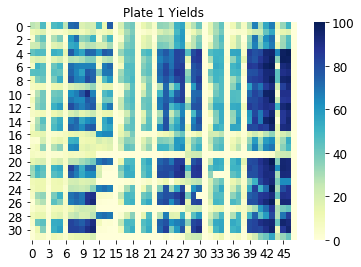

In [36]:
# Plate1 Yield Heatmap
ax = plt.axes()
plate1_yield_heatmap = sns.heatmap(plate1_yield, cmap="YlGnBu", ax=ax)
ax.set_title('Plate 1 Yields')
plt.show()

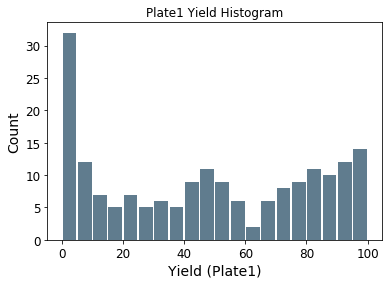

In [38]:
# Plate1 Histogram
plate1_yield.plot.hist(bins=20, color='#607c8e', rwidth=0.9, legend=None)
plt.title('Plate1 Yield Histogram')
plt.xlabel('Yield (Plate1)')
plt.ylabel('Count')
plt.show()

Almost done! 

Now we are going to save the cleaned plate1 data for future use.

In [39]:
# Save plate1_yield data 
# Add 'index=False' to remove the index in the DataFrame
plate1_yield.to_csv('YourPath/plate1_clean.csv', index=False)

In [40]:
# Test the saved plate1_yield data 
plate1_yield_test = pd.read_csv('YourPath/plate1_clean.csv')
plate1_yield_test

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,26.888615,24.063224,47.515821,2.126831,47.586354,50.060026,26.623393,71.962560,73.697234,17.985710,...,7.170838,30.199030,66.749508,29.587124,54.898343,67.302644,13.517446,33.448978,50.164385,0.0
1,10.657812,14.747896,18.278686,2.475058,6.119058,5.449924,7.802080,14.234178,15.413893,9.465696,...,3.920306,15.397530,22.450649,23.686174,42.694859,54.833609,6.351542,14.164722,17.378304,0.0
2,3.606677,35.078662,43.318146,0.000000,29.298178,37.565356,0.960810,59.019681,70.968730,35.139527,...,0.546830,35.870556,68.844495,33.875422,63.069719,70.629892,2.481416,31.678005,46.014200,0.0
3,22.166448,23.211569,34.748764,0.948129,16.649665,19.999826,4.992379,53.996993,57.375490,22.611658,...,4.206952,39.804358,66.763595,38.143027,56.516674,67.971728,13.292716,32.516603,47.334810,0.0
4,43.246874,47.072017,46.679233,1.477833,52.016631,49.533289,15.238016,76.008061,63.588682,56.116780,...,5.937925,83.761103,78.835107,80.947397,94.397752,95.423351,65.022002,98.035898,99.686532,0.0
5,15.417636,18.974171,16.815892,2.663355,16.048548,21.976633,7.641918,28.392318,26.674899,29.975430,...,15.319429,81.569431,77.573712,86.689600,92.914234,97.568500,35.555047,98.731320,98.287226,0.0
6,5.980980,50.582897,45.080480,0.000000,42.119461,49.111432,0.705225,70.862191,66.449518,65.939881,...,0.646779,86.597578,84.895513,91.390642,97.292933,99.619107,4.166287,92.572479,94.691054,0.0
7,45.048739,45.781001,44.653713,0.924542,44.558876,43.357210,3.420166,72.848314,65.311852,56.832804,...,4.582095,78.801089,79.444832,84.856098,93.310834,93.874541,44.027523,89.480651,91.485094,0.0
8,11.264227,37.482049,41.441061,0.000000,38.304316,53.104009,3.075984,77.361447,66.862345,65.327138,...,0.000000,81.917266,84.297489,86.214974,92.930932,98.033846,43.933313,94.935802,96.147987,0.0
9,7.372693,9.714563,9.546871,1.022402,12.592787,14.012417,4.337310,19.473790,23.296079,24.900114,...,0.000000,57.450487,77.027330,69.398552,85.441971,92.003250,21.861786,83.654332,92.956703,0.0


We just finished the EDA process of plate1 data. Now we can apply similar methods to process plate2 and plate3 data.

# Clean Plate2 and Plate3 Data

## Plate2

In [41]:
#Plate 2
plate2_1 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate2.1.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate2_1_yield = plate2_1['product_scaled']
plate2_1_yield_reshaped = pd.DataFrame(plate2_1_yield.values.reshape((16,24)))

plate2_2 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate2.2.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate2_2_yield = plate2_2['product_scaled']
plate2_2_yield_reshaped = pd.DataFrame(plate2_2_yield.values.reshape((16,24)), columns=np.arange(24,48))

plate2_3 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate2.3.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate2_3_yield = plate2_3['product_scaled']
plate2_3_yield_reshaped = pd.DataFrame(plate2_3_yield.values.reshape((16,24)))

plate2_4 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate2.4.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate2_4_yield = plate2_4['product_scaled']
plate2_4_yield_reshaped = pd.DataFrame(plate2_4_yield.values.reshape((16,24)), columns=np.arange(24,48))

plate2_12 = pd.concat([plate2_1_yield_reshaped, plate2_2_yield_reshaped], axis=1)
plate2_34 = pd.concat([plate2_3_yield_reshaped, plate2_4_yield_reshaped], axis=1)

plate2_yield = pd.concat([plate2_12, plate2_34], ignore_index=True)
plate2_yield

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,11.590500,12.368874,16.162579,1.729864,4.215754,4.112218,7.911193,13.996308,18.407813,13.987556,...,2.547972,17.094481,30.595145,26.312226,50.099448,55.003549,6.968929,18.118865,29.068447,0.0
1,1.251446,8.110761,9.109122,0.121774,3.267295,9.105544,0.689952,8.876632,6.083579,7.972544,...,0.000000,0.830867,2.902397,6.536001,46.544617,46.088463,0.000000,3.074694,5.085671,0.0
2,18.465078,13.471572,37.383548,1.208332,39.671429,41.178346,10.300043,61.725977,62.919569,19.786196,...,2.841460,36.582442,64.135991,32.165311,51.647648,58.398922,13.375728,30.612735,47.669490,0.0
3,9.055172,8.916454,8.674987,1.468936,2.627492,4.471163,6.906407,8.653540,10.223550,7.147436,...,3.462173,12.570607,12.671792,14.224884,19.782496,23.419947,6.131626,9.894362,12.537420,0.0
4,9.616113,13.664969,11.854292,2.579332,16.435829,18.296165,2.889330,19.256507,19.424899,30.388998,...,5.498717,68.260278,67.199248,73.076107,81.156185,79.527330,39.626886,82.027722,86.762118,0.0
5,10.051394,12.335936,10.490480,0.970983,13.337019,17.144825,4.522239,14.628299,13.956289,19.475563,...,0.000000,24.598211,66.868811,14.031850,60.859908,80.538647,0.000000,46.748065,45.535883,0.0
6,21.185881,23.006421,39.516592,2.048616,44.925202,47.052546,13.821003,72.608808,69.389893,62.426823,...,5.620590,73.062920,75.593775,76.302543,80.025516,83.653663,45.112382,78.618452,84.404163,0.0
7,8.912187,10.723426,11.812779,1.849601,9.065649,13.839204,4.278834,16.484045,17.452361,18.189903,...,16.128238,58.864107,61.875285,63.353662,81.857806,86.214964,26.579937,73.729485,77.850787,0.0
8,3.167837,1.983204,2.106144,0.295056,9.853261,9.685019,2.658634,14.467370,17.156074,28.400726,...,5.688672,64.997048,75.717197,77.926958,88.827578,84.310659,8.955958,80.649907,92.209311,0.0
9,2.887815,11.656260,12.510349,0.153243,10.421235,15.443716,1.034855,15.707925,11.231285,13.201300,...,3.206192,16.321241,73.162700,21.810453,48.232352,78.789708,0.000000,12.901614,26.679330,0.0


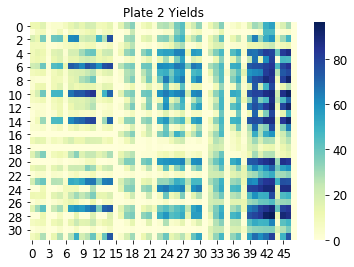

In [42]:
# Plate2 Yield Heatmap
ax = plt.axes()
plate2_yield_heatmap = sns.heatmap(plate2_yield, cmap="YlGnBu", ax=ax)
ax.set_title('Plate 2 Yields')
plt.show()

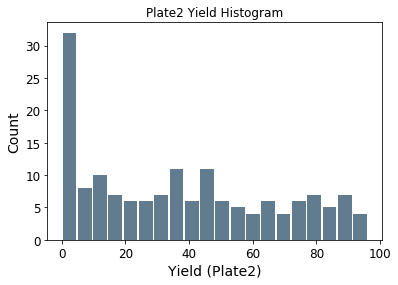

In [44]:
# Plate2 Histogram
plate2_yield.plot.hist(bins=20, color='#607c8e', rwidth=0.9, legend=None)
plt.title('Plate2 Yield Histogram')
plt.xlabel('Yield (Plate2)')
plt.ylabel('Count')
plt.show()

In [45]:
# Save plate2_yield data 
plate2_yield.to_csv('YourPath/plate2_clean.csv', index=False)

## Plate3

In [48]:
#Plate 3
plate3_1 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate3.1.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate3_1_yield = plate3_1['product_scaled']
plate3_1_yield_reshaped = pd.DataFrame(plate3_1_yield.values.reshape((16,24)))

plate3_2 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate3.2.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate3_2_yield = plate3_2['product_scaled']
plate3_2_yield_reshaped = pd.DataFrame(plate3_2_yield.values.reshape((16,24)), columns=np.arange(24,48))

plate3_3 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate3.3.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate3_3_yield = plate3_3['product_scaled']
plate3_3_yield_reshaped = pd.DataFrame(plate3_3_yield.values.reshape((16,24)))

plate3_4 = pd.read_csv('YourPath/rxnpredict-master/yield_data/plate3.4.csv', na_values=['#VALUE!', '#DIV/0!']).fillna(0)
plate3_4_yield = plate3_4['product_scaled']
plate3_4_yield_reshaped = pd.DataFrame(plate3_4_yield.values.reshape((16,24)), columns=np.arange(24,48))

plate3_12 = pd.concat([plate3_1_yield_reshaped, plate3_2_yield_reshaped], axis=1)
plate3_34 = pd.concat([plate3_3_yield_reshaped, plate3_4_yield_reshaped], axis=1)

plate3_yield = pd.concat([plate3_12, plate3_34], ignore_index=True)
plate3_yield

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,24.109058,32.877806,43.399430,1.221284,25.177977,32.372537,7.676009,60.417327,64.506672,36.555226,...,0.662350,21.777735,53.280016,23.909357,47.157717,62.535488,4.577604,21.194447,42.000651,0.0
1,18.400355,16.252388,42.715216,0.000000,39.121484,47.598731,3.597790,69.987373,70.054833,20.975815,...,2.217163,25.835829,53.845338,25.368478,50.910412,62.699099,5.005509,24.928958,43.082231,0.0
2,26.471050,15.007905,40.670667,10.034719,44.507572,50.812270,13.261538,66.432955,69.215648,16.475922,...,5.967393,28.839212,55.769125,27.194529,55.410753,64.884234,7.657085,24.917286,43.472816,0.0
3,6.618305,19.221894,38.881698,0.000000,8.123761,9.226197,0.340411,32.956421,47.363337,24.016317,...,0.942728,17.294892,38.166311,25.483133,49.963765,54.073342,3.609434,16.571624,32.519415,0.0
4,24.170240,35.805523,40.294775,3.120934,42.301497,40.311935,10.903978,61.056459,64.440517,70.147010,...,1.442503,67.970157,67.991521,83.174900,81.274600,84.682454,23.797705,79.511666,79.642529,0.0
5,31.733181,33.920932,38.412518,1.277605,46.049561,43.335395,9.850315,63.838846,64.601872,54.533366,...,3.864236,69.256191,68.717376,82.511319,84.424299,83.825282,33.619283,76.737259,78.252993,0.0
6,33.447098,36.565261,39.557929,8.389648,65.927423,63.532847,9.771809,64.805600,63.415149,62.465609,...,5.460904,69.079365,67.520364,84.814586,83.825372,85.994697,45.198763,78.633533,81.630720,0.0
7,17.501085,38.943394,40.111423,0.000000,42.744776,44.878135,0.649111,65.573019,66.676010,70.249056,...,0.609948,70.199260,65.421334,84.649754,83.385011,86.497145,0.000000,78.002884,79.346546,0.0
8,7.147037,28.252774,34.796073,0.471327,38.409462,42.828748,6.975927,54.390402,68.431677,70.513594,...,4.041325,55.239356,71.832078,71.001367,80.781040,91.139149,2.354282,72.701818,81.997631,0.0
9,1.222907,24.605635,33.556510,0.000000,46.670867,49.728089,7.810318,64.561691,69.136886,80.285342,...,4.961974,70.714113,71.827517,86.699680,84.339744,89.129877,6.458218,76.473732,83.599360,0.0


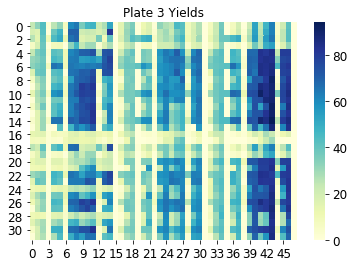

In [49]:
# Plate3 Yield Heatmap
ax = plt.axes()
plate3_yield_heatmap = sns.heatmap(plate3_yield, cmap="YlGnBu", ax=ax)
ax.set_title('Plate 3 Yields')
plt.show()

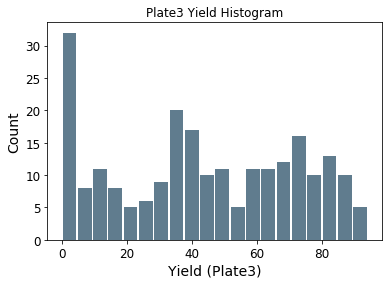

In [50]:
# Plate3 Histogram
plate3_yield.plot.hist(bins=20, color='#607c8e', rwidth=0.9, legend=None)
plt.title('Plate3 Yield Histogram')
plt.xlabel('Yield (Plate3)')
plt.ylabel('Count')
plt.show()

In [51]:
# Save plate3_yield data 
plate3_yield.to_csv('YourPath/plate3_clean.csv', index=False)

## All-plate

In [52]:
all_plate = pd.concat([plate1_yield, plate2_yield, plate3_yield], ignore_index = True)
all_plate

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,26.888615,24.063224,47.515821,2.126831,47.586354,50.060026,26.623393,71.962560,73.697234,17.985710,...,7.170838,30.199030,66.749508,29.587124,54.898343,67.302644,13.517446,33.448978,50.164385,0.0
1,10.657812,14.747896,18.278686,2.475058,6.119058,5.449924,7.802080,14.234178,15.413893,9.465696,...,3.920306,15.397530,22.450649,23.686174,42.694859,54.833609,6.351542,14.164722,17.378304,0.0
2,3.606677,35.078662,43.318146,0.000000,29.298178,37.565356,0.960810,59.019681,70.968730,35.139527,...,0.546830,35.870556,68.844495,33.875422,63.069719,70.629892,2.481416,31.678005,46.014200,0.0
3,22.166448,23.211569,34.748764,0.948129,16.649665,19.999826,4.992379,53.996993,57.375490,22.611658,...,4.206952,39.804358,66.763595,38.143027,56.516674,67.971728,13.292716,32.516603,47.334810,0.0
4,43.246874,47.072017,46.679233,1.477833,52.016631,49.533289,15.238016,76.008061,63.588682,56.116780,...,5.937925,83.761103,78.835107,80.947397,94.397752,95.423351,65.022002,98.035898,99.686532,0.0
5,15.417636,18.974171,16.815892,2.663355,16.048548,21.976633,7.641918,28.392318,26.674899,29.975430,...,15.319429,81.569431,77.573712,86.689600,92.914234,97.568500,35.555047,98.731320,98.287226,0.0
6,5.980980,50.582897,45.080480,0.000000,42.119461,49.111432,0.705225,70.862191,66.449518,65.939881,...,0.646779,86.597578,84.895513,91.390642,97.292933,99.619107,4.166287,92.572479,94.691054,0.0
7,45.048739,45.781001,44.653713,0.924542,44.558876,43.357210,3.420166,72.848314,65.311852,56.832804,...,4.582095,78.801089,79.444832,84.856098,93.310834,93.874541,44.027523,89.480651,91.485094,0.0
8,11.264227,37.482049,41.441061,0.000000,38.304316,53.104009,3.075984,77.361447,66.862345,65.327138,...,0.000000,81.917266,84.297489,86.214974,92.930932,98.033846,43.933313,94.935802,96.147987,0.0
9,7.372693,9.714563,9.546871,1.022402,12.592787,14.012417,4.337310,19.473790,23.296079,24.900114,...,0.000000,57.450487,77.027330,69.398552,85.441971,92.003250,21.861786,83.654332,92.956703,0.0


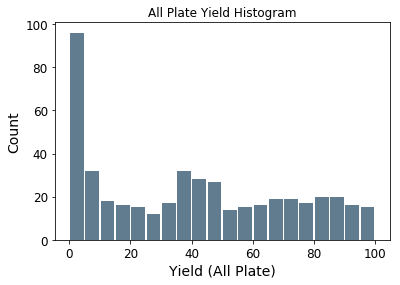

In [53]:
#Plot all_plate histogram 
all_plate.plot.hist(bins=20, color='#607c8e', rwidth=0.9, legend=None)
plt.title('All Plate Yield Histogram')
plt.xlabel('Yield (All Plate)')
plt.ylabel('Count')
plt.show()

We have finished the data cleaning process of all three plates. 